### Classifying and predicting early hospital readmissions:

Classifying with supervised learning whether diabetic patients are readmitted, and if they are, if it's before or after 30 days.

Using the dataset from here: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [1]:
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
patientdata = pd.read_csv('../../data/diabetic_data.csv')

In [3]:
patientdata.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
patientdata.shape

(101766, 50)

In [5]:
patientdata.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
patientdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

#### Age and weight should be numeric, not object - weight and age are both given as ranges rather than a discrete value
#### Also No and Yes should be changed to 0 and 1

In [7]:
patientdata.weight.unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [8]:
patientdata.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Replacing the codes with their actual meanings:

In [9]:
patientdata.admission_type_id.replace(
    list(range(1, 9)), ['Emergency',
                        'Urgent',
                        'Elective',
                        'Newborn',
                        'Not Available',
                        'NULL',
                        'Trauma Center',
                        'Not Mapped'], inplace=True)
# patientdata.admission_type_id.head()

In [10]:
id_list = ['Discharged to home',
           'Discharged/transferred to another short term hospital',
           'Discharged/transferred to SNF',
           'Discharged/transferred to ICF',
           'Discharged/transferred to another type of inpatient care institution',
           'Discharged/transferred to home with home health service',
           'Left AMA',
           'Discharged/transferred to home under care of Home IV provider',
           'Admitted as an inpatient to this hospital',
           'Neonate discharged to another hospital for neonatal aftercare',
           'Expired',
           'Still patient or expected to return for outpatient services',
           'Hospice / home',
           'Hospice / medical facility',
           'Discharged/transferred within this institution to Medicare approved swing bed',
           'Discharged/transferred/referred another institution for outpatient services',
           'Discharged/transferred/referred to this institution for outpatient services',
           'NULL',
           'Expired at home. Medicaid only, hospice.',
           'Expired in a medical facility. Medicaid only, hospice.',
           'Expired, place unknown. Medicaid only, hospice.',
           'Discharged/transferred to another rehab fac including rehab units of a hospital .',
           'Discharged/transferred to a long term care hospital.',
           'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
           'Not Mapped',
           'Unknown/Invalid',
           'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
           'Discharged/transferred to a federal health care facility.',
           'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
           'Discharged/transferred to a Critical Access Hospital (CAH).']

patientdata.discharge_disposition_id.replace(
    list(range(1, len(id_list)+1)), id_list, inplace=True)
patientdata.discharge_disposition_id.head()

0            Not Mapped
1    Discharged to home
2    Discharged to home
3    Discharged to home
4    Discharged to home
Name: discharge_disposition_id, dtype: object

In [11]:
id_list = ['Physician Referral',
           'Clinic Referral',
           'HMO Referral',
           'Transfer from a hospital',
           'Transfer from a Skilled Nursing Facility (SNF)',
           'Transfer from another health care facility',
           'Emergency Room',
           'Court/Law Enforcement',
           'Not Available',
           'Transfer from critial access hospital',
           'Normal Delivery',
           'Premature Delivery',
           'Sick Baby',
           'Extramural Birth',
           'Not Available',
           'NULL',
           'Transfer From Another Home Health Agency',
           'Readmission to Same Home Health Agency',
           'Not Mapped',
           'Unknown/Invalid',
           'Transfer from hospital inpt/same fac reslt in a sep claim',
           'Born inside this hospital',
           'Born outside this hospital',
           'Transfer from Ambulatory Surgery Center',
           'Transfer from Hospice']

patientdata.admission_source_id.replace(
    list(range(1, len(id_list)+1)), id_list, inplace=True)
patientdata.admission_source_id.head()

0    Physician Referral
1        Emergency Room
2        Emergency Room
3        Emergency Room
4        Emergency Room
Name: admission_source_id, dtype: object

In [12]:
patientdata.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,NULL,Not Mapped,Physician Referral,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,Emergency,Discharged to home,Emergency Room,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,Emergency,Discharged to home,Emergency Room,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,Emergency,Discharged to home,Emergency Room,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,Emergency,Discharged to home,Emergency Room,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
# patientdata.drop(patientdata['discharge_disposition_id'].str.contains("Expired"),inplace=True)
patientdata = patientdata[patientdata.discharge_disposition_id.str.contains(
    "Expired") == False]

In [14]:
patientdata.shape

(100114, 50)

#### ICD9 codes from here:
    http://www.icd9data.com/

In [15]:
numeric_code_ranges = [(1, 139),
                       (140, 239),
                       (240, 279),
                       (280, 289),
                       (290, 319),
                       (320, 389),
                       (390, 459),
                       (460, 519),
                       (520, 579),
                       (580, 629),
                       (630, 677),
                       (680, 709),
                       (710, 739),
                       (740, 759),
                       (760, 779),
                       (780, 799),
                       (800, 999)]

In [16]:
numeric_code_ranges

[(1, 139),
 (140, 239),
 (240, 279),
 (280, 289),
 (290, 319),
 (320, 389),
 (390, 459),
 (460, 519),
 (520, 579),
 (580, 629),
 (630, 677),
 (680, 709),
 (710, 739),
 (740, 759),
 (760, 779),
 (780, 799),
 (800, 999)]

In [17]:
ICD9_diagnosis_groups = ['Infectious And Parasitic Diseases',
                         'Neoplasms',
                         'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders',
                         'Diseases Of The Blood And Blood-Forming Organs',
                         'Mental Disorders',
                         'Diseases Of The Nervous System And Sense Organs',
                         'Diseases Of The Circulatory System',
                         'Diseases Of The Respiratory System',
                         'Diseases Of The Digestive System',
                         'Diseases Of The Genitourinary System',
                         'Complications Of Pregnancy, Childbirth, And The Puerperium',
                         'Diseases Of The Skin And Subcutaneous Tissue',
                         'Diseases Of The Musculoskeletal System And Connective Tissue',
                         'Congential Anomalies',
                         'Certain Conditions Originating In The Perinatal Period',
                         'Symptoms, Signs, And Ill-Defined Conditions',
                         'Injury And Poisoning']

In [18]:
ICD9_diagnosis_groups

['Infectious And Parasitic Diseases',
 'Neoplasms',
 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders',
 'Diseases Of The Blood And Blood-Forming Organs',
 'Mental Disorders',
 'Diseases Of The Nervous System And Sense Organs',
 'Diseases Of The Circulatory System',
 'Diseases Of The Respiratory System',
 'Diseases Of The Digestive System',
 'Diseases Of The Genitourinary System',
 'Complications Of Pregnancy, Childbirth, And The Puerperium',
 'Diseases Of The Skin And Subcutaneous Tissue',
 'Diseases Of The Musculoskeletal System And Connective Tissue',
 'Congential Anomalies',
 'Certain Conditions Originating In The Perinatal Period',
 'Symptoms, Signs, And Ill-Defined Conditions',
 'Injury And Poisoning']

In [19]:
codes = zip(numeric_code_ranges, ICD9_diagnosis_groups)
code_set = set(codes)

In [20]:
code_set

{((1, 139), 'Infectious And Parasitic Diseases'),
 ((140, 239), 'Neoplasms'),
 ((240, 279),
  'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'),
 ((280, 289), 'Diseases Of The Blood And Blood-Forming Organs'),
 ((290, 319), 'Mental Disorders'),
 ((320, 389), 'Diseases Of The Nervous System And Sense Organs'),
 ((390, 459), 'Diseases Of The Circulatory System'),
 ((460, 519), 'Diseases Of The Respiratory System'),
 ((520, 579), 'Diseases Of The Digestive System'),
 ((580, 629), 'Diseases Of The Genitourinary System'),
 ((630, 677), 'Complications Of Pregnancy, Childbirth, And The Puerperium'),
 ((680, 709), 'Diseases Of The Skin And Subcutaneous Tissue'),
 ((710, 739), 'Diseases Of The Musculoskeletal System And Connective Tissue'),
 ((740, 759), 'Congential Anomalies'),
 ((760, 779), 'Certain Conditions Originating In The Perinatal Period'),
 ((780, 799), 'Symptoms, Signs, And Ill-Defined Conditions'),
 ((800, 999), 'Injury And Poisoning')}

In [21]:
patientdataICD9 = patientdata.copy()

In [22]:
for num_range, diagnosis in code_set:
    # print(num_range)
    oldlist = range(num_range[0], num_range[1]+1)
    oldlist = [str(x) for x in oldlist]
    newlist = [diagnosis] * len(oldlist)
    for curr_col in ['diag_1', 'diag_2', 'diag_3']:
        patientdataICD9[curr_col].replace(oldlist, newlist, inplace=True)

In [23]:
for curr_col in ['diag_1', 'diag_2', 'diag_3']:
    patientdataICD9[curr_col].replace(oldlist, newlist, inplace=True)
    patientdataICD9.loc[patientdataICD9[curr_col].str.contains(
        'V'), curr_col] = 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services'

In [24]:
for curr_col in ['diag_1', 'diag_2', 'diag_3']:
    patientdataICD9[curr_col].replace(oldlist, newlist, inplace=True)
    patientdataICD9.loc[patientdataICD9[curr_col].str.contains(
        'E'), curr_col] = 'Supplementary Classification Of External Causes Of Injury And Poisoning'

In [25]:
for curr_col in ['diag_1', 'diag_2', 'diag_3']:
    patientdataICD9[curr_col].replace(oldlist, newlist, inplace=True)
    patientdataICD9.loc[patientdataICD9[curr_col].str.contains(
        '250'), curr_col] = 'Diabetes mellitus'

In [26]:
print(patientdataICD9['diag_1'].unique())
print(len(patientdataICD9['diag_1'].unique()))

['Diabetes mellitus'
 'Supplementary Classification Of External Causes Of Injury And Poisoning'
 'Complications Of Pregnancy, Childbirth, And The Puerperium'
 'Infectious And Parasitic Diseases' 'Neoplasms'
 'Diseases Of The Circulatory System' 'Diseases Of The Respiratory System'
 'Injury And Poisoning' 'Diseases Of The Skin And Subcutaneous Tissue'
 'Diseases Of The Musculoskeletal System And Connective Tissue'
 'Diseases Of The Digestive System'
 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services'
 'Symptoms, Signs, And Ill-Defined Conditions'
 'Diseases Of The Genitourinary System' 'Mental Disorders'
 'Diseases Of The Nervous System And Sense Organs'
 'Diseases Of The Blood And Blood-Forming Organs' '?'
 'Congential Anomalies']
19


In [27]:
y = patientdata.readmitted

In [28]:
y.head()

0     NO
1    >30
2     NO
3     NO
4     NO
Name: readmitted, dtype: object

In [29]:
x = pd.get_dummies(patientdataICD9.drop(columns=['readmitted', 'encounter_id', 'patient_nbr']))

### Class distribution:
The classes are imbalanced, so I'll need to keep that in mind going forward. I'll need to stratify and/or use SMOTE, etc.

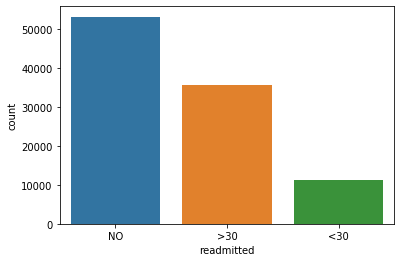

In [30]:
sns.countplot(y)

#### Logistic regression, KNN, and SVM all need to be scaled. 

#### I'll use standard scaler (transform to have mean of 0, std of 1).

In [31]:
numeric_columns = list(x.select_dtypes("int64").columns)
numeric_columns

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [32]:
scaler = preprocessing.StandardScaler()

In [33]:
# saving this scaled version of x in case I want to use it outside of test-train split somewhere

x_scaled = x.copy()
x_scaled[numeric_columns] = scaler.fit_transform(x_scaled[numeric_columns])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [35]:
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

In [36]:
# fit_transform on train
x_train_scaled[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])

# transform on test
x_test_scaled[numeric_columns] = scaler.transform(x_test[numeric_columns])

In [37]:
x.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_?,race_AfricanAmerican,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,1,41,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
1,3,59,0,18,0,0,0,9,0,0,...,1,0,1,0,1,0,1,0,0,1
2,2,11,5,13,2,0,1,6,0,1,...,1,0,1,0,1,0,0,1,0,1
3,2,44,1,16,0,0,0,7,0,0,...,1,0,1,0,1,0,1,0,0,1
4,1,51,0,8,0,0,0,5,0,0,...,1,0,1,0,1,0,1,0,0,1


In [38]:
x.shape

(100114, 317)

#### Using the broad ICD9 codes brought my x columns down to 269 from 2467

#### Now that these look nice, time to pickle my stuff to use in different models:

In [39]:
with open('x_liv.pkl', 'wb') as picklefile:
    pickle.dump(x, picklefile)

with open('y_liv.pkl', 'wb') as picklefile:
    pickle.dump(y, picklefile)

with open('x_train_liv.pkl', 'wb') as picklefile:
    pickle.dump(x_train, picklefile)

with open('x_test_liv.pkl', 'wb') as picklefile:
    pickle.dump(x_test, picklefile)

with open('y_train_liv.pkl', 'wb') as picklefile:
    pickle.dump(y_train, picklefile)

with open('y_test_liv.pkl', 'wb') as picklefile:
    pickle.dump(y_test, picklefile)

with open('x_train_scaled_liv.pkl', 'wb') as picklefile:
    pickle.dump(x_train_scaled, picklefile)

with open('x_test_scaled_liv.pkl', 'wb') as picklefile:
    pickle.dump(x_test_scaled, picklefile)

with open('x_scaled_liv.pkl', 'wb') as picklefile:
    pickle.dump(x_scaled, picklefile)

with open('patientdataICD9_liv.pkl', 'wb') as picklefile:
    pickle.dump(patientdataICD9, picklefile)